# C_model

В данном блокноте отражена заключительная часть работы по построентию Регрессионной модели продаж фарм. препарата (yy).  
Этому предшествовали:
- определение перечня факторов,
- сбор и переработка информации из множества различных источников,
- обсуждение промежуточных результатов с представителями бизнеса.

В качестве предикторов рассматривались показатели:
- визитной активности мед представителей,
- инструменты продвижения через аптечные сети,
- информация по конференциям и круглым столам,
- реклама и сезонность.

В наличии имеется 30 наблюдений, что накладывает определённые ограницения на выбор модели.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
os.chdir(r'C:\Data\Илья\DataScience\C_model')

In [4]:
c_model = pd.read_excel('C_model_enc.xlsx')

In [5]:
c_model.head()

,yy,x01,x02,x03,x04,x05,x06,x07,x08,x09,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,1.227,1.000,1.000,4.442,191.575,1.464,132.602,113.328,4.095,10.548,...,1.707,1.601,1.0,1.612,1.000,1.000,1.000,1,1,1
1,1.376,1.162,1.225,5.229,289.375,1.474,95.297,140.560,14.383,20.060,...,1.719,1.615,1.0,1.612,1.225,1.149,1.206,2,1,2
2,1.320,1.165,1.266,3.782,84.755,1.477,55.757,31.178,7.508,7.222,...,1.719,1.615,1.0,1.692,1.266,1.146,1.226,3,1,3
3,1.350,1.212,1.279,2.491,5.702,1.473,11.403,5.702,0.000,0.000,...,1.723,1.626,1.0,1.390,1.279,1.211,1.215,4,1,4
4,1.296,1.269,1.351,3.033,0.000,1.473,0.000,0.000,0.000,0.000,...,1.723,1.626,1.0,1.390,1.351,1.274,1.254,5,1,5


In [6]:
c_model.shape

(30, 21)

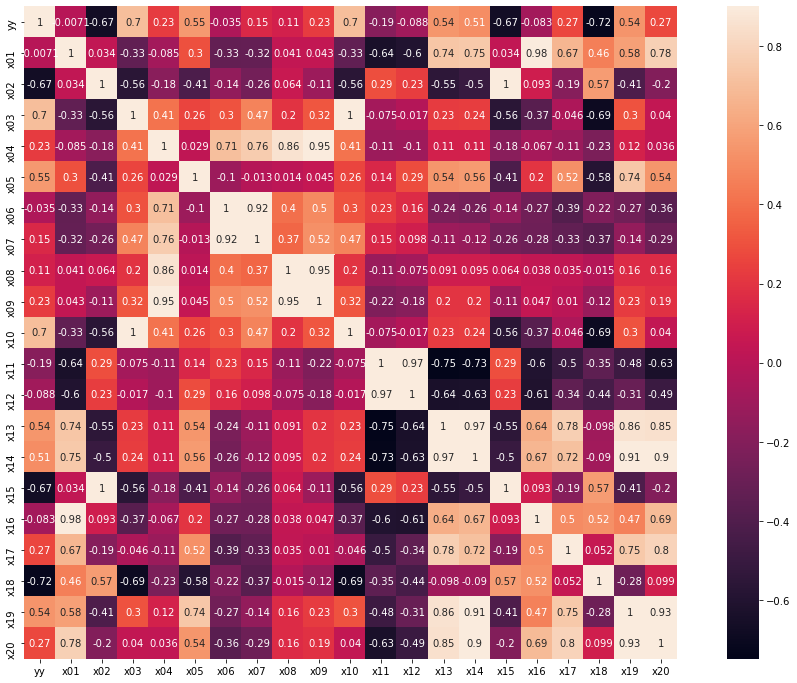

In [7]:
corrmat = c_model.corr()
plt.subplots(figsize=(18,12))
sns.heatmap(corrmat, vmax=0.9, square=True, annot = True);

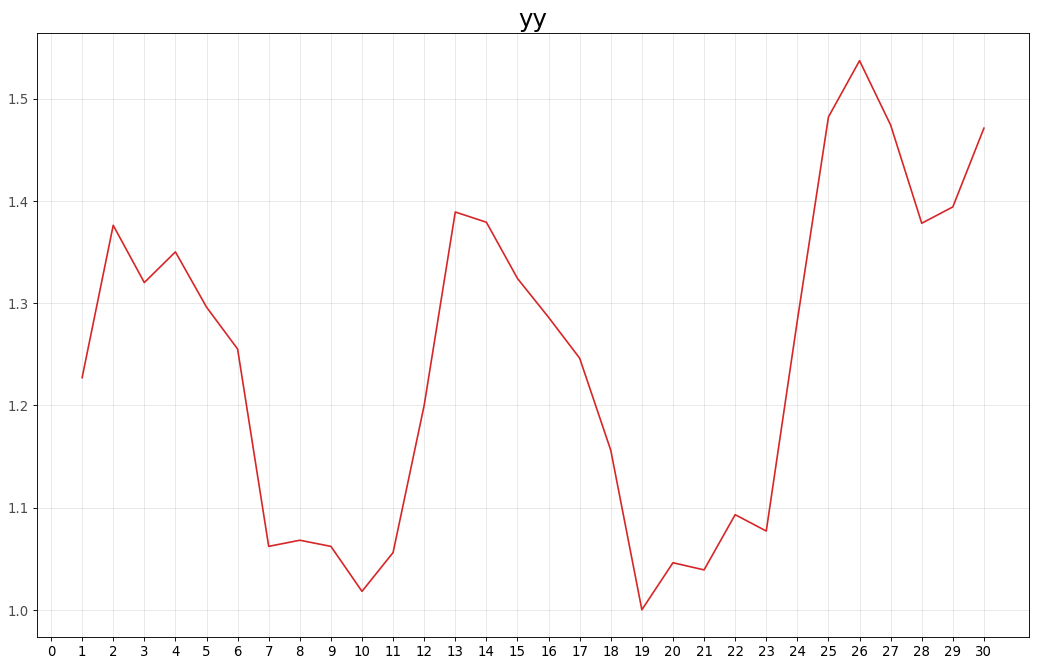

In [8]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('x20', 'yy', data=c_model, color='tab:red');
# Decoration
#plt.legend(loc='best')
xtick_location = c_model.index.tolist()[::12]
plt.yticks(fontsize=12, alpha=.7)
x = np.random.randint(low=0, high=50, size=30)
plt.xticks(np.arange(0, len(x)+1, 1),fontsize=12)
plt.title("yy", fontsize=22)
plt.grid(axis='both', alpha=.3)

In [9]:
print(c_model.shape)
ntrain = c_model.shape[0]*0.8
ntrain

(30, 21)


24.0

In [10]:
train = c_model.loc[:ntrain]
test = c_model.loc[ntrain+1:]

In [11]:
y_train = train.yy
y_test = test.yy
train = train.drop(['yy'], axis=1)
test = test.drop(['yy'], axis=1)

In [12]:
train

,x01,x02,x03,x04,x05,x06,x07,x08,x09,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,1.000,1.000,4.442,191.575,1.464,132.602,113.328,4.095,10.548,4.442,1.707,1.601,1.000,1.612,1.000,1.000,1.000,1,1,1
1,1.162,1.225,5.229,289.375,1.474,95.297,140.560,14.383,20.060,5.229,1.719,1.615,1.000,1.612,1.225,1.149,1.206,2,1,2
2,1.165,1.266,3.782,84.755,1.477,55.757,31.178,7.508,7.222,3.782,1.719,1.615,1.000,1.692,1.266,1.146,1.226,3,1,3
3,1.212,1.279,2.491,5.702,1.473,11.403,5.702,0.000,0.000,2.491,1.723,1.626,1.000,1.390,1.279,1.211,1.215,4,1,4
4,1.269,1.351,3.033,0.000,1.473,0.000,0.000,0.000,0.000,3.033,1.723,1.626,1.000,1.390,1.351,1.274,1.254,5,1,5
5,1.341,1.389,0.000,138.197,1.460,70.126,60.834,9.556,10.429,0.000,1.723,1.626,1.000,1.002,1.389,1.350,1.314,6,1,6
6,1.405,1.420,0.000,196.711,1.453,137.135,101.774,14.246,12.798,0.000,1.717,1.615,1.000,1.000,1.420,1.416,1.371,7,1,7
7,1.364,1.374,0.000,70.635,1.443,67.968,49.293,2.540,2.877,0.000,1.705,1.601,1.000,1.000,1.374,1.378,1.322,8,1,8
8,1.388,1.419,2.625,216.406,1.443,103.145,70.098,23.889,19.722,2.625,1.705,1.601,1.000,1.000,1.419,1.396,1.361,9,1,9
9,1.298,1.390,1.000,19.335,1.000,9.534,11.917,1.000,1.000,1.000,1.009,1.072,1.697,2.200,1.390,1.286,1.339,10,1,10


In [13]:
train.shape, test.shape

((25, 20), (5, 20))

### Modelling

In [14]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
#Validation function
n_folds = 5

def mse_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    return cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf)

In [16]:
# LASSO Regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(train, y_train)

score_train = mse_cv(lasso)
print("Lasso score Train: {:.3f} ({:.3f})\n".format(score_train.mean(), score_train.std()))

lasso_test_pred = lasso.predict(test)
lasso_score_test = -mean_squared_error(y_test, lasso_test_pred)

print("Lasso score Test: {:.3f}".format(lasso_score_test))

Lasso score Train: -0.251 (0.332)

Lasso score Test: -0.059


In [17]:
# Elastic Net Regression
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
ENet.fit(train, y_train)

score_train = mse_cv(ENet)
print("ElasticNet score: {:.3f} ({:.3f})\n".format(score_train.mean(), score_train.std()))

ENet_test_pred = ENet.predict(test)
ENet_score_test =  -mean_squared_error(y_test, ENet_test_pred)
print("ElasticNet score: {:.3f}".format(ENet_score_test))

ElasticNet score: -0.254 (0.334)

ElasticNet score: -0.061


In [18]:
# Kernel Ridge Regression :
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
KRR.fit(train, y_train)

score_train = mse_cv(KRR)
print("Kernel Ridge score: {:.3f} ({:.3f})\n".format(score_train.mean(), score_train.std()))

KRR_test_pred = KRR.predict(test)
KRR_score_test =  -mean_squared_error(y_test, KRR_test_pred)
print("Kernel Ridge score: {:.3f}".format(KRR_score_test))

Kernel Ridge score: -0.547 (0.283)

Kernel Ridge score: -1.470


In [19]:
# RandomForest
RandFor = RandomForestRegressor(n_estimators=20, random_state=0)
RandFor.fit(train, y_train)

score_train = mse_cv(RandFor)
print("Random Forest score: {:.3f} ({:.3f})\n".format(score_train.mean(), score_train.std()))

RandFor_test_pred = RandFor.predict(test)
RandFor_score_test =  -mean_squared_error(y_test, RandFor_test_pred)
print("Random Forest score: {:.3f}".format(RandFor_score_test))

Random Forest score: -0.012 (0.006)

Random Forest score: -0.024


### BEst Prediction

In [20]:
lasso_dict =  {'lasso_score_test'  : lasso_score_test}
ENet_dict =   {'ENet_score_test'   : ENet_score_test}
KRR_dict =    {'KRR_score_test'    : KRR_score_test }
RandFor_dict ={'RandFor_score_test': RandFor_score_test }

All_dict = {**lasso_dict, **ENet_dict, **KRR_dict, **RandFor_dict}

In [21]:
All_dict

{'lasso_score_test': -0.058809489431371965,
 'ENet_score_test': -0.06146890265987046,
 'KRR_score_test': -1.470229725852309,
 'RandFor_score_test': -0.024000842499999987}

In [22]:
max(All_dict.values())  #

-0.024000842499999987

In [23]:
def get_key(d, val):
    for k, v in d.items():
        if v == val:
            return k

In [24]:
d = All_dict
val = max(All_dict.values())

get_key(d, val)

'RandFor_score_test'

In [25]:
RandFor_train_pred = RandFor.predict(train)
c_model['RandFor_Predict'] = pd.Series(np.concatenate((RandFor_train_pred,RandFor_test_pred),axis=0))

In [26]:
RandFor_r2 = r2_score(c_model.yy, c_model.RandFor_Predict)
print(f'Rand Forest R-squared is {RandFor_r2:.1%}')

Rand Forest R-squared is 79.2%


### Plot (Random Forest)

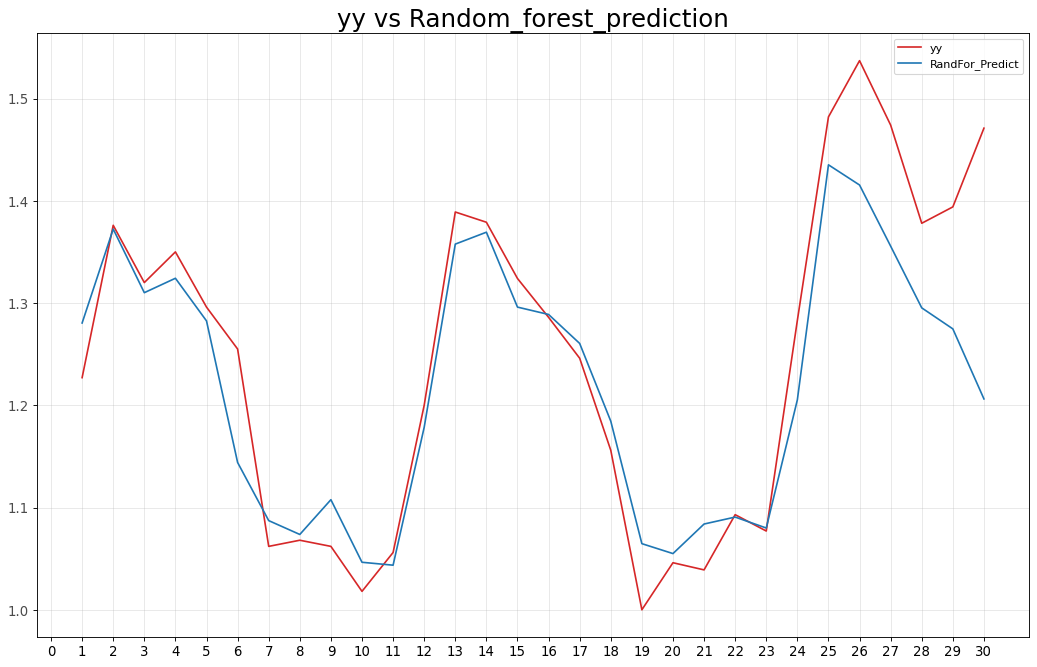

In [27]:
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('x20', 'yy', data=c_model, color='tab:red');
plt.plot('x20', 'RandFor_Predict', data=c_model, color='tab:blue');
plt.legend(loc='best')
xtick_location = c_model.index.tolist()[::12]
plt.yticks(fontsize=12, alpha=.7)
x = np.random.randint(low=0, high=50, size=30)
plt.xticks(np.arange(0, len(x)+1, 1),fontsize=12)
plt.title("yy vs Random_forest_prediction", fontsize=22)
plt.grid(axis='both', alpha=.3)

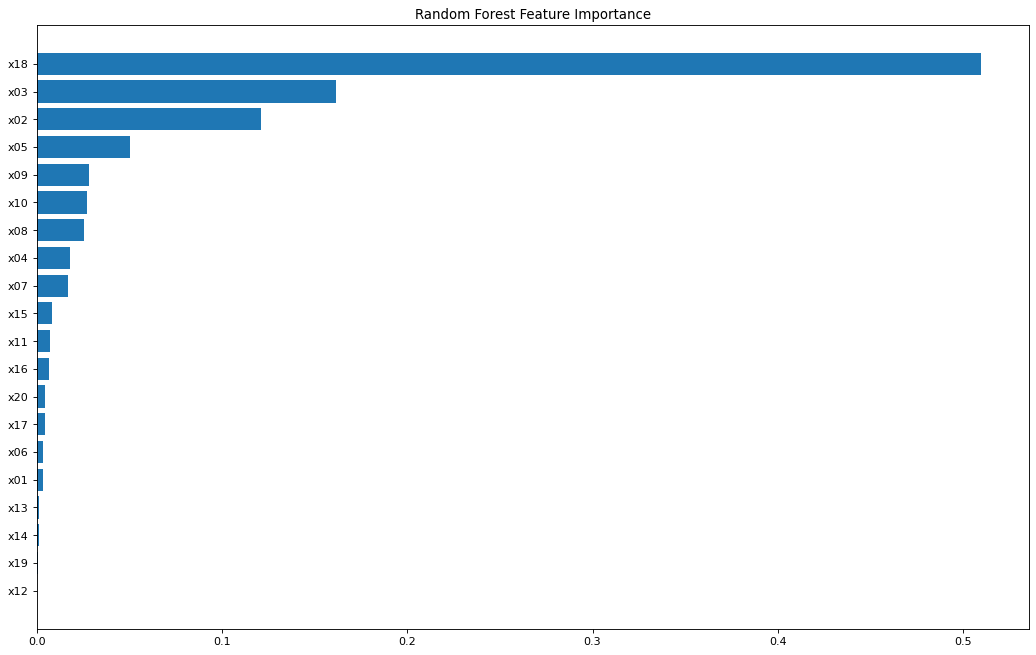

In [28]:
plt.figure(figsize=(16,10), dpi= 80)
sorted_idx = RandFor.feature_importances_.argsort()
plt.barh(train.columns[sorted_idx], RandFor.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance");

### Выводы:
- Лучше всего себя показала модель "Случайный лес". R2 = 79%
- Предсказанные (на последние 5 периодов) значения отличаются от фактических из-за того что фактические значения явно отклонились от тенденции прошлых периодов
- Наиболее значимыми факторами оказались x18, x03, x02, x05 - что полностью соответствует логике продаж прогнозируемого препарата